# Generate Synthetic Dataset

# Gym User Dropout Prediction Dataset

## Description
This synthetic dataset simulates user behavior in a fitness application, designed to predict the risk of gym membership dropout based on attendance patterns and personal attributes. The dataset contains 10,000 realistic user profiles with features that influence gym retention, making it ideal for classification tasks in behavioral analytics.

## Key Features
- **Realistic distributions** matching actual gym user behavior patterns
- **Complex feature interactions** that simulate real-world decision-making
- **Controlled noise** to mimic natural data variability
- **Balanced classes** for effective machine learning modeling

## Potential Use Cases
- Predicting at-risk users for retention interventions
- Analyzing factors contributing to gym commitment
- Developing personalized workout recommendations
- Behavioral segmentation of fitness app users

## Dataset Characteristics
- Number of instances: 10,000
- Number of features: 8 predictive + 1 target
- Missing values: No
- Synthetic but realistic: Yes

## Columns Description

| Feature | Type | Description | Value Range |
|---------|------|-------------|-------------|
| user_id | int | Unique user identifier | 1-10000 |
| age | int | User's age | 18-60 (peaked at 25-40) |
| gender | categorical | User's gender | Male/Female |
| sessions_per_week | int | Weekly gym attendance | 0-7 sessions |
| avg_session_duration | float | Average workout length in minutes | 10-120 |
| progress_score | float | Composite fitness progress metric | 0-100 |
| mood_after | categorical | Post-workout emotional state | Energized/Neutral/Fatigued |
| injury | categorical | Reported workout injuries | None/Knee/Back/Shoulder |
| dropout | binary | Target variable - quit status | 0 (active)/1 (quit) |

## Generation Methodology
Data was programmatically generated with:
1. Base distributions matching real gym statistics
2. Logical correlations between features (e.g., more sessions → longer durations)
3. Non-linear relationships in target variable
4. Controlled noise injection (Gaussian + categorical variability)

## Suggested Evaluation Metrics
For classification models:
- Precision-Recall curves (class imbalance consideration)
- F1 score
- ROC AUC
- Feature importance analysis

## License
CC0: Public Domain (Free to use for any purpose)

## Acknowledgements
Synthetic dataset created for machine learning education and benchmarking purposes. Inspired by real fitness app analytics challenges.


## Importing the libraries


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import choices, randint, uniform, random
from faker import Faker

In [43]:
import numpy as np
import pandas as pd
from faker import Faker

# Initialize Faker and seed
fake = Faker()
np.random.seed(42)

# Base settings
n_users = 1000
user_ids = range(1, n_users + 1)

# Ages: متوزعة بين 20 - 50
ages = np.random.randint(20, 51, size=n_users)

# Gender
genders = np.random.choice(['Male', 'Female'], size=n_users)

# Sessions per week
sessions = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], size=n_users, p=[0.05, 0.1, 0.2, 0.25, 0.2, 0.1, 0.07, 0.03])

# Session duration: مرتبط بعدد الجلسات لكن بنطاق أضيق
durations = [np.clip(np.random.normal(30 + s * 4, 5), 10, 90) for s in sessions]
durations = [round(d, 1) for d in durations]

# Progress score: مباشر وبسيط من الجلسات والمدة
progress_scores = [round(min(100, s * 6 + d * 0.5 + np.random.normal(0, 5)), 1) for s, d in zip(sessions, durations)]

# Mood after workout (مبسطة)
moods = []
for score in progress_scores:
    if score < 30:
        moods.append(np.random.choice(['Fatigued', 'Neutral'], p=[0.7, 0.3]))
    elif score > 70:
        moods.append(np.random.choice(['Energized', 'Neutral'], p=[0.7, 0.3]))
    else:
        moods.append(np.random.choice(['Neutral', 'Fatigued', 'Energized'], p=[0.5, 0.3, 0.2]))

# Injury (unchanged)
injuries = np.random.choice(['None', 'Knee', 'Back', 'Shoulder'], size=n_users, p=[0.8, 0.08, 0.08, 0.04])

# Dropout logic (مبسط ومناسب للـ SVM)
dropouts = []
for s, p in zip(sessions, progress_scores):
    if s <= 1 or p < 30:
        dropouts.append(1)
    elif s >= 4 and p > 60:
        dropouts.append(0)
    else:
        dropouts.append(np.random.choice([0, 1], p=[0.6, 0.4]))

# Final DataFrame
data = pd.DataFrame({
    'user_id': user_ids,
    'age': ages,
    'gender': genders,
    'sessions_per_week': sessions,
    'avg_session_duration': durations,
    'progress_score': progress_scores,
    'mood_after': moods,
    'injury': injuries,
    'dropout': dropouts
})

# Display and save
print(data.head(10).to_markdown(index=False))
data.to_csv('gym_user_dropout_dataset.csv', index=False)


|   user_id |   age | gender   |   sessions_per_week |   avg_session_duration |   progress_score | mood_after   | injury   |   dropout |
|----------:|------:|:---------|--------------------:|-----------------------:|-----------------:|:-------------|:---------|----------:|
|         1 |    26 | Male     |                   2 |                   41.5 |             33.7 | Fatigued     | None     |         0 |
|         2 |    39 | Male     |                   6 |                   54.5 |             60.5 | Energized    | None     |         0 |
|         3 |    48 | Female   |                   7 |                   57.5 |             69.8 | Neutral      | None     |         0 |
|         4 |    34 | Male     |                   6 |                   51   |             58.2 | Neutral      | Back     |         0 |
|         5 |    30 | Male     |                   3 |                   46.4 |             39.7 | Energized    | None     |         0 |
|         6 |    27 | Male     |         

## **Data Preprocessing**

* **Load dataset** using `pandas`.
* **Handle categorical features**:

  * Encode `gender`, `mood_after`, `injury` using `OneHotEncoder` or `LabelEncoder`.
* **Normalize numerical features** (optional):

  * `MinMaxScaler` or `StandardScaler` on session duration, progress, etc.
* **Split data:**

  * `X_train`, `X_test`, `y_train`, `y_test` (e.g., 80/20 split)

# **Exploratory Data Analysis (EDA)**

In [44]:
data = pd.read_csv("../data/gym_user_dropout_dataset.csv")

In [45]:
data.head()

,user_id,age,gender,sessions_per_week,avg_session_duration,progress_score,mood_after,injury,dropout
0,1,26,Male,2,41.5,33.7,Fatigued,NaN,0
1,2,39,Male,6,54.5,60.5,Energized,NaN,0
2,3,48,Female,7,57.5,69.8,Neutral,NaN,0
3,4,34,Male,6,51.0,58.2,Neutral,Back,0
4,5,30,Male,3,46.4,39.7,Energized,NaN,0


In [46]:
data.shape 

(1000, 9)

In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1000.0,500.5000,288.819436,1.0,250.750,500.5,750.25,1000.0
age,1000.0,35.4480,9.243957,20.0,27.000,36.0,44.00,50.0
sessions_per_week,1000.0,3.2010,1.669547,0.0,2.000,3.0,4.00,7.0
avg_session_duration,1000.0,42.7006,8.097515,20.7,37.400,42.6,48.00,69.7
progress_score,1000.0,40.5403,14.499199,1.1,30.175,40.0,50.20,82.9
dropout,1000.0,0.4970,0.500241,0.0,0.000,0.0,1.00,1.0


### **key observations** 



####  **General Information**

* The dataset contains **10,000 users** (`count = 10000`).
* It includes 6 features: `user_id`, `age`, `sessions_per_week`, `avg_session_duration`, `progress_score`, and `dropout`.



####  **User Demographics (age)**

* **Age Range**: 18 to 60 years.
* **Average Age**: \~32 years old.
* **Age Distribution**:

  * 25% of users are **24 or younger**.
  * 50% (median) are **30 years old** or less.
  * 75% are **36 years old** or less.

*Most users are young to middle-aged adults.*



####  **Engagement Metrics**

##### `sessions_per_week`

* **Range**: 0 to 7 sessions/week.
* **Mean**: 3.25 sessions/week.
* **25% of users** train **≤ 2 times/week**.
* **75% of users** train **≤ 4 times/week**.

 *Training frequency skews toward moderate engagement.*

##### `avg_session_duration`

* **Range**: 10 to 93.5 minutes.
* **Average Duration**: \~46 minutes.
* **25% of users** train **≤ 37.1 mins/session**.
* **75% train ≤ 55.2 mins/session**.

 *Most users prefer 35–55 minute sessions.*

####  **Progress Score**

* **Range**: 0 to 100.
* **Mean**: \~39.37.
* **Median**: \~39.45.
* The score distribution is fairly **balanced**, with slight left skew (some low progress users).

 *Users tend to have moderate progress scores.*


####  **Dropout Indicator**

* **Binary Column** (0 = Not Dropped, 1 = Dropped).
* **Mean**: \~0.3928 ⇒ **\~39.3% dropout rate**.
* **Median**: 0.0 ⇒ At least **50% of users stayed**.
* **75th percentile = 1** ⇒ 25% of users definitely dropped out.

 *A significant portion of users (\~40%) dropped out.*



####  **Class Imbalance Note**

* The dropout column has an imbalance:

  * \~60.7% did **not** drop out.
  * \~39.3% **did** drop out.

 *Might require balancing techniques in model training (e.g., class weights or SMOTE).*



In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   sessions_per_week     1000 non-null   int64  
 4   avg_session_duration  1000 non-null   float64
 5   progress_score        1000 non-null   float64
 6   mood_after            1000 non-null   object 
 7   injury                210 non-null    object 
 8   dropout               1000 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


### Observation 
-The columns `injury` have missing values.


In [49]:
(((data.isnull().sum())*100)/len(data)).sort_values(ascending=False)

injury                  79.0
user_id                  0.0
age                      0.0
gender                   0.0
sessions_per_week        0.0
avg_session_duration     0.0
progress_score           0.0
mood_after               0.0
dropout                  0.0
dtype: float64

In [50]:
data['injury']= data['injury'].fillna('None')

In [51]:
data.isnull().sum()

user_id                 0
age                     0
gender                  0
sessions_per_week       0
avg_session_duration    0
progress_score          0
mood_after              0
injury                  0
dropout                 0
dtype: int64

In [52]:
data.duplicated().sum()

0

# **Visualization Data**

###  Histogram Distribution

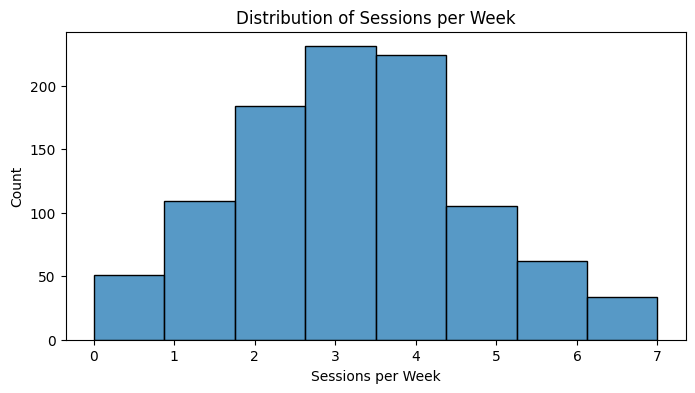

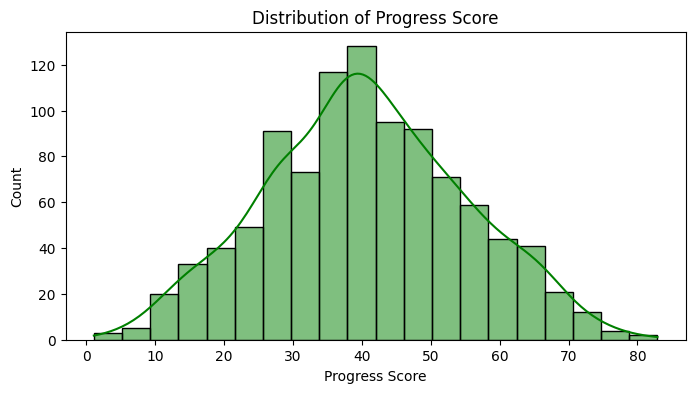

In [53]:

# Histogram for sessions_per_week
plt.figure(figsize=(8, 4))
sns.histplot(data['sessions_per_week'], bins=8)
plt.title("Distribution of Sessions per Week")
plt.xlabel("Sessions per Week")
plt.ylabel("Count")
plt.show()

# Histogram for progress_score
plt.figure(figsize=(8, 4))
sns.histplot(data['progress_score'], bins=20, kde=True, color='green')
plt.title("Distribution of Progress Score")
plt.xlabel("Progress Score")
plt.ylabel("Count")
plt.show()


##  2. Countplots for mood_after and dropout

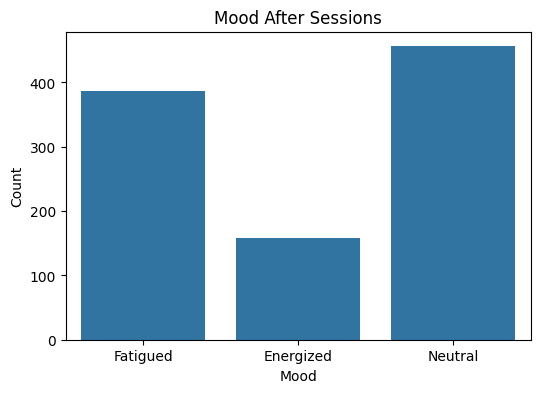

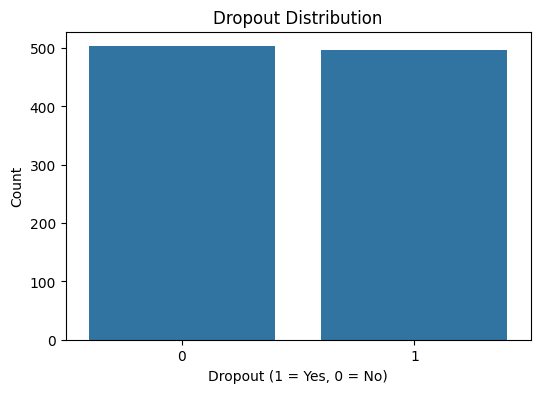

In [54]:
# Countplot for mood_after
plt.figure(figsize=(6, 4))
sns.countplot(x='mood_after', data=data)
plt.title("Mood After Sessions")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.show()

# Countplot for dropout
plt.figure(figsize=(6, 4))
sns.countplot(x='dropout', data=data)
plt.title("Dropout Distribution")
plt.xlabel("Dropout (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


## 4. Dropout Rate by Sessions Per Week Buckets

C:\Users\digital\AppData\Local\Temp\ipykernel_1940\1426405805.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dropout_by_bucket = data.groupby('sessions_bucket')['dropout'].mean().reset_index()


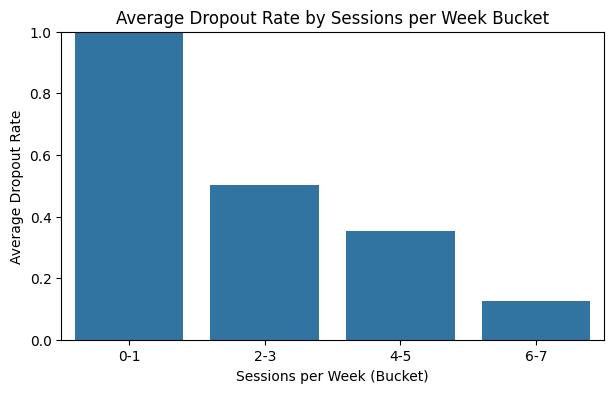

In [55]:
# Create buckets for sessions_per_week
data['sessions_bucket'] = pd.cut(data['sessions_per_week'], bins=[-1, 1, 3, 5, 7], labels=['0-1', '2-3', '4-5', '6-7'])

# Plot dropout rate for each bucket
dropout_by_bucket = data.groupby('sessions_bucket')['dropout'].mean().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(x='sessions_bucket', y='dropout', data=dropout_by_bucket)
plt.title("Average Dropout Rate by Sessions per Week Bucket")
plt.xlabel("Sessions per Week (Bucket)")
plt.ylabel("Average Dropout Rate")
plt.ylim(0, 1)
plt.show()


# Encoding categorical data

In [56]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
catgorical_features = data.select_dtypes(include=['object']).columns
print(numeric_features)
print(catgorical_features)

Index(['user_id', 'age', 'sessions_per_week', 'avg_session_duration',
       'progress_score', 'dropout'],
      dtype='object')
Index(['gender', 'mood_after', 'injury'], dtype='object')


In [57]:
data[catgorical_features].head()

,gender,mood_after,injury
0,Male,Fatigued,None
1,Male,Energized,None
2,Female,Neutral,None
3,Male,Neutral,Back
4,Male,Energized,None


In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_encder= encoder.fit_transform(data[catgorical_features])

In [59]:
encoded_df = pd.DataFrame(
    cat_encder,
    columns=encoder.get_feature_names_out(catgorical_features)
)

In [60]:
encoded_df.head()

,gender_Male,mood_after_Fatigued,mood_after_Neutral,injury_Knee,injury_None,injury_Shoulder
0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0


# marge the encoded categorical features with the original DataFrame


In [61]:
numerical_df = data[numeric_features]
data = pd.concat([numerical_df, encoded_df], axis=1)

In [62]:
data.head()

,user_id,age,sessions_per_week,avg_session_duration,progress_score,dropout,gender_Male,mood_after_Fatigued,mood_after_Neutral,injury_Knee,injury_None,injury_Shoulder
0,1,26,2,41.5,33.7,0,1.0,1.0,0.0,0.0,1.0,0.0
1,2,39,6,54.5,60.5,0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,48,7,57.5,69.8,0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,34,6,51.0,58.2,0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,30,3,46.4,39.7,0,1.0,0.0,0.0,0.0,1.0,0.0


In [63]:
data.shape

(1000, 12)

# **Model Building**

## Split the Data

In [64]:
data.columns 

Index(['user_id', 'age', 'sessions_per_week', 'avg_session_duration',
       'progress_score', 'dropout', 'gender_Male', 'mood_after_Fatigued',
       'mood_after_Neutral', 'injury_Knee', 'injury_None', 'injury_Shoulder'],
      dtype='object')

In [65]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['user_id', 'dropout'])
y = data['dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (800, 10), Test set shape: (200, 10)


# Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', probability=True, C=1)
model.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[91  7]
 [48 54]]
              precision    recall  f1-score   support

           0       0.65      0.93      0.77        98
           1       0.89      0.53      0.66       102

    accuracy                           0.72       200
   macro avg       0.77      0.73      0.72       200
weighted avg       0.77      0.72      0.71       200

Accuracy: 0.725


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


In [71]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True, C=1,gamma='scale')
model.fit(X_train, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[83 15]
 [43 59]]
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        98
           1       0.80      0.58      0.67       102

    accuracy                           0.71       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.73      0.71      0.71       200

Accuracy: 0.71


In [73]:
y.value_counts()


dropout
0    503
1    497
Name: count, dtype: int64

In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')
model


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[81 17]
 [42 60]]
              precision    recall  f1-score   support

           0       0.66      0.83      0.73        98
           1       0.78      0.59      0.67       102

    accuracy                           0.70       200
   macro avg       0.72      0.71      0.70       200
weighted avg       0.72      0.70      0.70       200

Accuracy: 0.705


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=1, 
    verbose=2
)


grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)


print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", best_rf.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END ma

In [78]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [79]:
model = RandomForestClassifier(class_weight='balanced', **grid_search.best_params_)
model


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[89  9]
 [42 60]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        98
           1       0.87      0.59      0.70       102

    accuracy                           0.74       200
   macro avg       0.77      0.75      0.74       200
weighted avg       0.78      0.74      0.74       200

Accuracy: 0.745
